In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
import plotly.graph_objs as go

In [6]:
import matplotlib.pyplot as plt

In [7]:
Anio_act='2018'
Mes_act='11'
Dia_act='29'

In [8]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# %matplotlib notebook

In [9]:
corr_act={
    'ruta':'..\..\..\..\BASES DATATOOLS\ASIGNACION\\2018\\NOVIEMBRE\Sistema de cobro_'+Dia_act+'_'+Mes_act+'_'+Anio_act+'.xlsx',
    'hoja':'Asignacion',
    'cartera':'CORRIENTE',
    'identificador':'IDENTIFICACION_DEUDOR'}

men_act={
    'ruta':'..\..\..\..\BASES DATATOOLS\ASIGNACION\\2018\\NOVIEMBRE\Sistema de cobro_'+Dia_act+'_'+Mes_act+'_'+Anio_act+'.xlsx',
    'hoja':'Menores',
    'cartera':'MENOR',
    'identificador':'IDENTIFICACION_DEUDOR'
}

In [10]:
arch_corr_act=pd.read_excel(open(corr_act['ruta'],'rb'), sheet_name=corr_act['hoja'], dtype={corr_act['identificador']: str})
arch_menr_act=pd.read_excel(open(men_act['ruta'],'rb'), sheet_name=men_act['hoja'], dtype={men_act['identificador']: str})

<IPython.core.display.Javascript object>


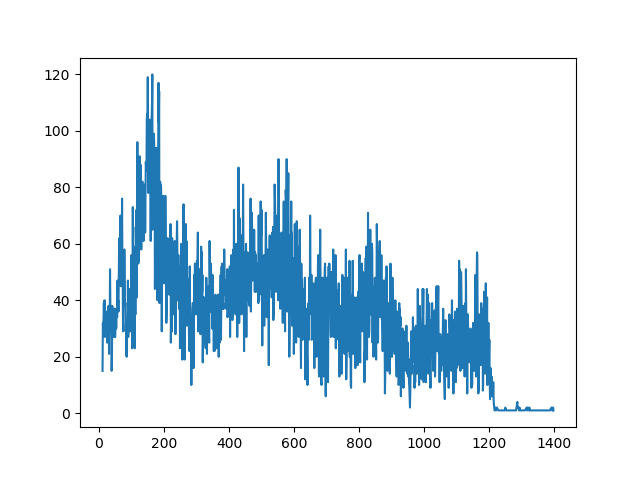

In [11]:
arch_corr_act[arch_corr_act['DIAS_MORA']>0]['DIAS_MORA'].dropna().astype('float64').map(lambda x: round(x//1)*1).value_counts().sort_index().plot.line()

In [40]:
sns.kdeplot(arch_corr_act.DIAS_MORA)

In [22]:
df = arch_corr_act.assign(n=0).groupby(['DIAS_MORA', 'SALDO'])['n'].count().reset_index()
df = df[df["SALDO"] < 500]
v = df.pivot(index='SALDO', columns='DIAS_MORA', values='n').fillna(0).values.tolist()

In [23]:
iplot([go.Surface(z=v)])

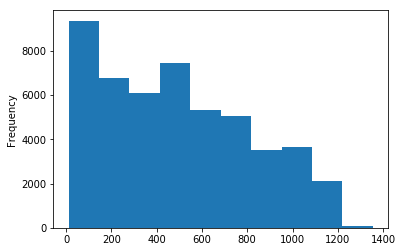

In [9]:
arch_corr_act['DIAS_MORA'].plot.hist()

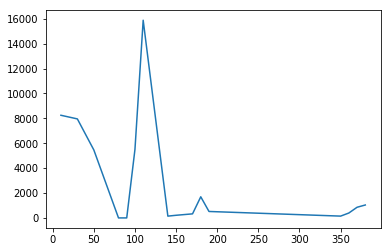

In [10]:
arch_corr_act[arch_corr_act['SALDO']<600]['SALDO'].dropna().astype('float64').map(lambda x: round(x//10)*10).value_counts().sort_index().plot.line()

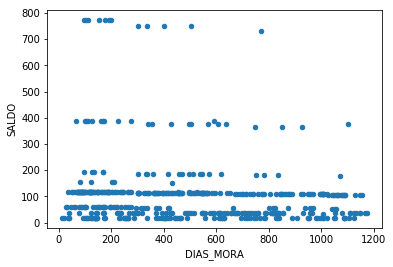

In [10]:
arch_corr_act[arch_corr_act['SALDO']<500].sample(500).plot.scatter(x='DIAS_MORA', y='SALDO')

c:\users\michael\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


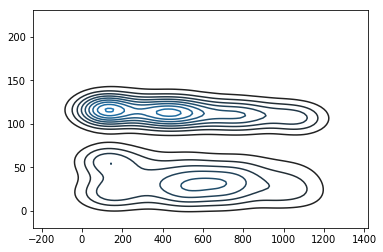

In [13]:
sns.kdeplot(arch_corr_act[arch_corr_act['SALDO']<200].loc[:, ['DIAS_MORA', 'SALDO']].dropna().sample(1000))

In [14]:
darta=arch_corr_act[arch_corr_act['SALDO']<200].loc[:, ['DIAS_MORA', 'SALDO','ESTADO']].dropna().sample(1000)

In [11]:
sns.set(style="darkgrid")
setosa = darta.query("ESTADO == 'PROMESA ROTA'")
virginica = darta.query("ESTADO == 'LLAMADA PENDIENTE'")

# Set up the figure
f, ax = plt.subplots(figsize=(10, 25))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(virginica.DIAS_MORA, virginica.SALDO,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(setosa.DIAS_MORA, setosa.SALDO,
                 cmap="Reds", shade=True, shade_lowest=False)


# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(10, 30, "Promesas rotas", size=6, color=blue)
ax.text(3.8, 4.5, "llamada pendiente", size=6, color=red)

NameError: name 'darta' is not defined

In [18]:
darta2=arch_corr_act[arch_corr_act['SALDO']<500].loc[:, ['DIAS_MORA', 'SALDO']].dropna().sample(3000)

Text(300,500,'Multas')

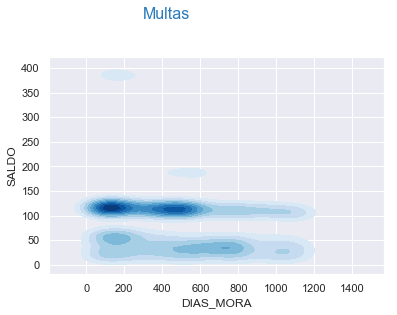

In [19]:
# sns.set(style="darkgrid")
# Set up the figure
f, ax = plt.subplots()
# Draw the two density plots
ax = sns.kdeplot(darta2.DIAS_MORA, darta2.SALDO,
                 cmap="Blues", shade=True, shade_lowest=False)
# Add labels to the plot
red = sns.color_palette("Blues")[-2]
ax.text(300,500, "Multas", size=16, color=red)

<IPython.core.display.Javascript object>


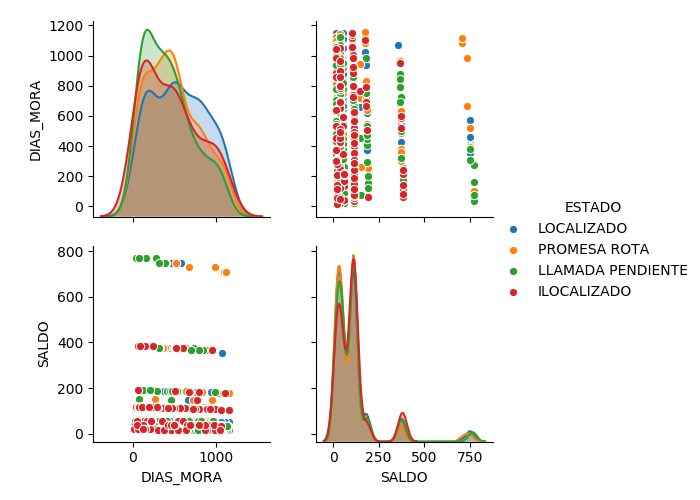

In [81]:
sns.pairplot(arch_corr_act[arch_corr_act['ESTADO'].isin(['PROMESA ROTA','LLAMADA PENDIENTE','ILOCALIZADO','LOCALIZADO'])].loc[:, ['DIAS_MORA', 'SALDO','ESTADO']].dropna().sample(1000),hue='ESTADO')

<IPython.core.display.Javascript object>


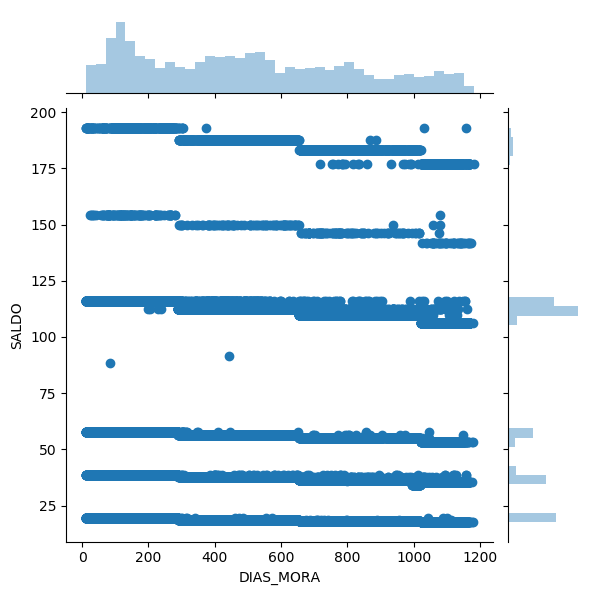

In [61]:
sns.jointplot(x='DIAS_MORA', y='SALDO', data=arch_corr_act[arch_corr_act['SALDO']<200])

<IPython.core.display.Javascript object>


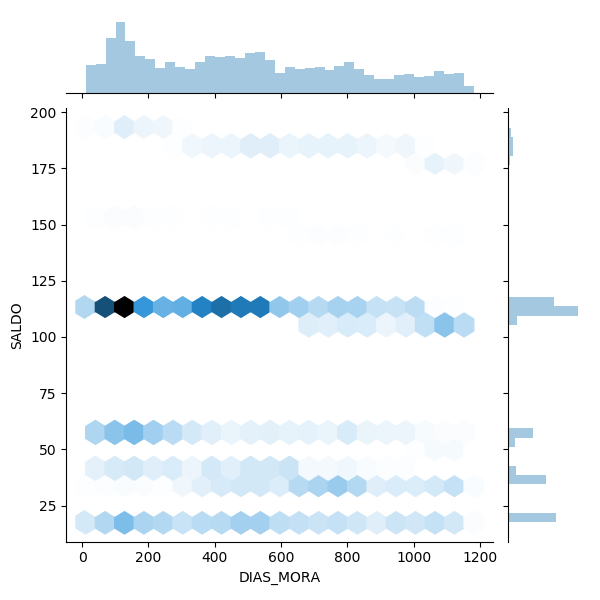

In [63]:
sns.jointplot(x='DIAS_MORA', y='SALDO', data=arch_corr_act[arch_corr_act['SALDO']<200], kind='hex', gridsize=20)

<IPython.core.display.Javascript object>


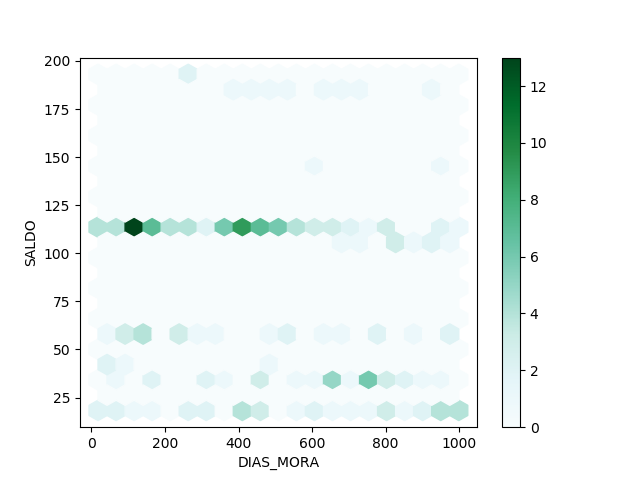

In [62]:
arch_corr_act[(arch_corr_act['SALDO']<200) & (arch_corr_act['DIAS_MORA']<1000)].sample(200).plot.hexbin(x='DIAS_MORA', y='SALDO', gridsize=20)

<IPython.core.display.Javascript object>


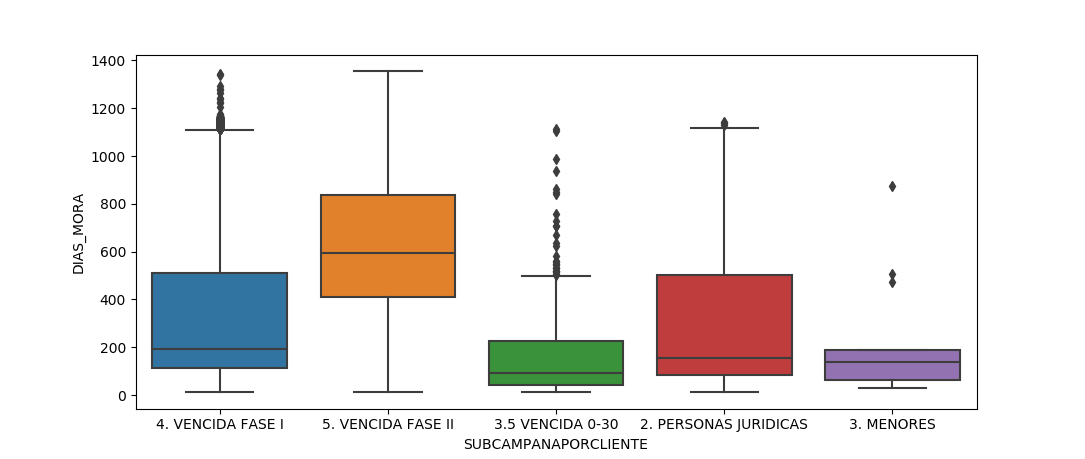

In [65]:
sns.boxplot(x='SUBCAMPANAPORCLIENTE',y='DIAS_MORA',data=arch_corr_act)

<IPython.core.display.Javascript object>


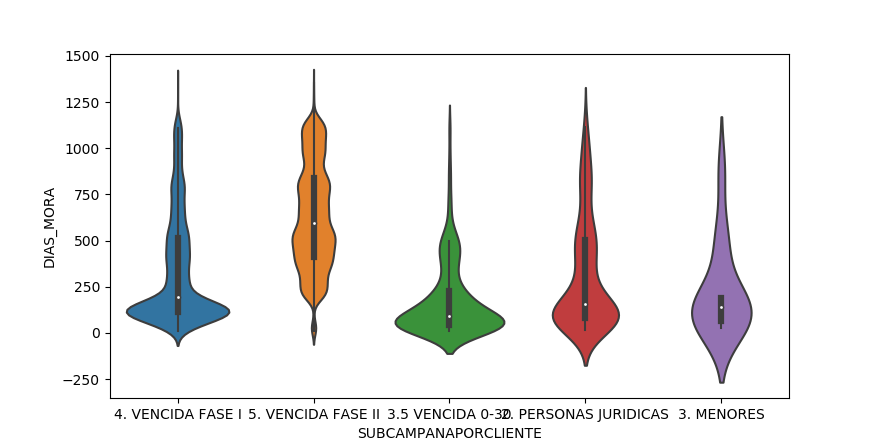

In [66]:
sns.violinplot(x='SUBCAMPANAPORCLIENTE',y='DIAS_MORA',data=arch_corr_act)

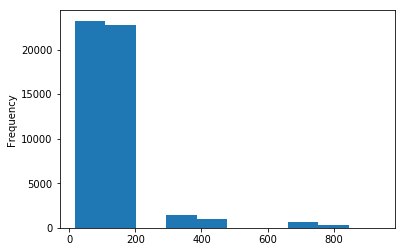

In [10]:
arch_corr_act[arch_corr_act['SALDO'] < 1000]['SALDO'].plot.hist()

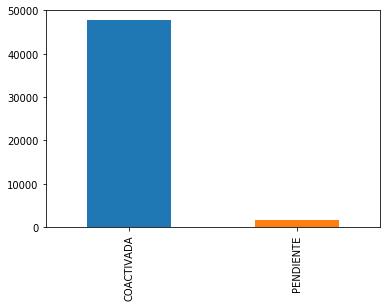

In [11]:
arch_corr_act['ESTADO AXIS'].value_counts().plot.bar()

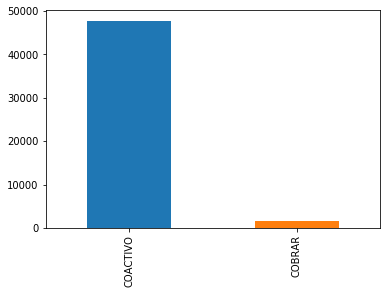

In [12]:
arch_corr_act['ESTADO_CREDITO'].value_counts().plot.bar()

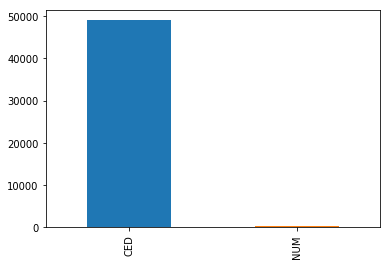

In [13]:
arch_corr_act['TIPO_IDENTIFICACION'].value_counts().plot.bar()

In [34]:
vare=arch_corr_act.drop_duplicates(['IDENTIFICACION_DEUDOR'], keep='first')

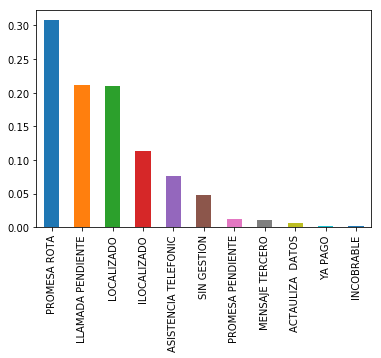

In [35]:
(vare['ESTADO'].value_counts()/ len(vare)).plot.bar()

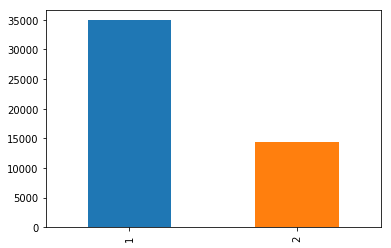

In [15]:
arch_corr_act['CODIGO_CONDICION'].value_counts().plot.bar()

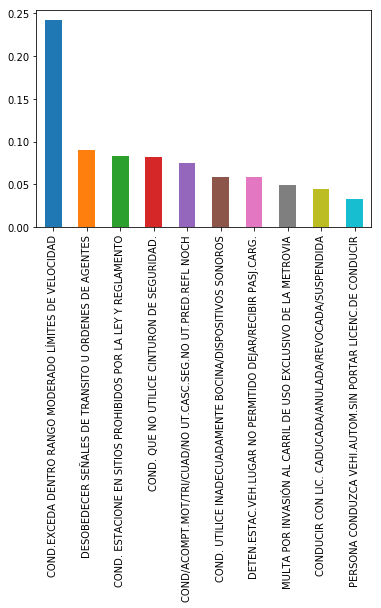

In [16]:
(arch_corr_act['DESCRIPCION_INFRACION'].value_counts().head(10)/ len(arch_corr_act)).plot.bar()

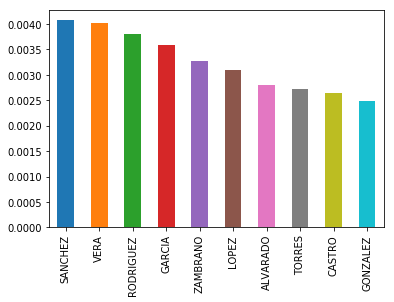

In [17]:
(arch_corr_act.drop_duplicates(['PRIMER_APELLIDO','SEGUNDO_APELLIDO','PRIMER_NOMBRE','SEGUNDO_NOMBRE'], keep='first')['PRIMER_APELLIDO'].value_counts().head(10)/ len(arch_corr_act)).plot.bar()

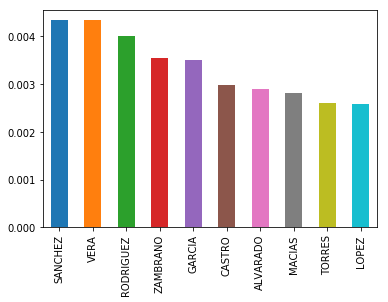

In [19]:
(arch_corr_act.drop_duplicates(['PRIMER_APELLIDO','SEGUNDO_APELLIDO','PRIMER_NOMBRE','SEGUNDO_NOMBRE'], keep='first')['SEGUNDO_APELLIDO'].value_counts().head(10)/ len(arch_corr_act)).plot.bar()

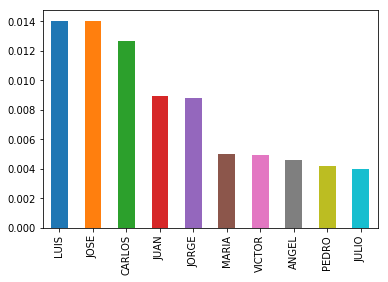

In [20]:
(arch_corr_act.drop_duplicates(['PRIMER_APELLIDO','SEGUNDO_APELLIDO','PRIMER_NOMBRE','SEGUNDO_NOMBRE'], keep='first')['PRIMER_NOMBRE'].value_counts().head(10)/ len(arch_corr_act)).plot.bar()

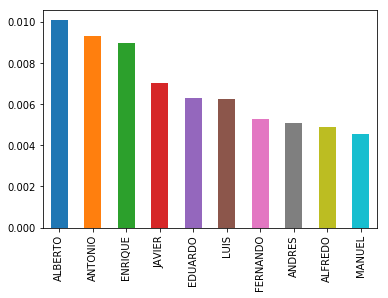

In [21]:
(arch_corr_act.drop_duplicates(['PRIMER_APELLIDO','SEGUNDO_APELLIDO','PRIMER_NOMBRE','SEGUNDO_NOMBRE'], keep='first')['SEGUNDO_NOMBRE'].value_counts().head(10)/ len(arch_corr_act)).plot.bar()

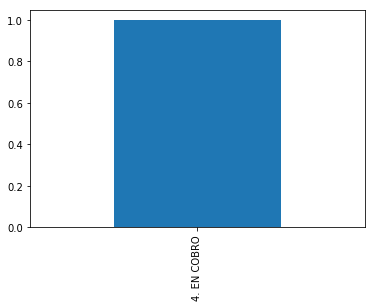

In [22]:
(arch_corr_act['CAMPANAPORCLIENTE'].value_counts().head(10)/ len(arch_corr_act)).plot.bar()

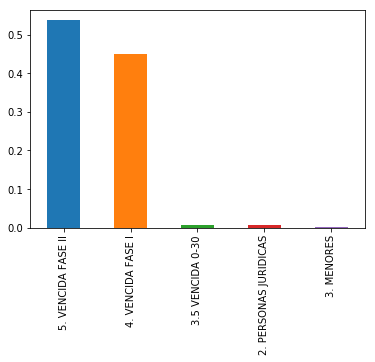

In [23]:
(arch_corr_act['SUBCAMPANAPORCLIENTE'].value_counts().head(10)/ len(arch_corr_act)).plot.bar()

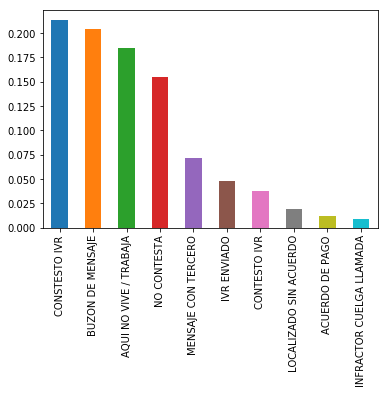

In [24]:
(arch_corr_act['MEJOR_RESPUESTA'].value_counts().head(10)/ len(arch_corr_act)).plot.bar()

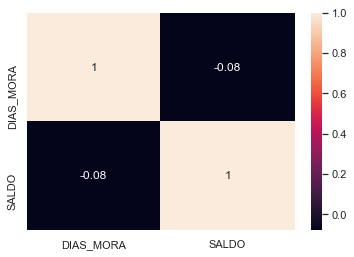

In [20]:
f=arch_corr_act[arch_corr_act['SALDO']<200].loc[:, ['DIAS_MORA', 'SALDO','ESTADO']].dropna().sample(1000).corr()
sns.heatmap(f, annot=True)

In [25]:
arch_corr_act.columns

Index(['IDENTIFICACION_DEUDOR', 'TIPO_IDENTIFICACION', 'NUMERO_CUENTA',
       'ESTADO AXIS', 'ESTADO_CREDITO', 'SALDO', 'DIAS_MORA', 'ESTADO',
       'CODIGO_CONDICION', 'PLACA_VEHICULO', 'DESCRIPCION_INFRACION',
       'FECHA_PRESCRIBE', 'FECHA_ULTIMA_GESTION', 'RAZONSOCIAL',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'PRIMER_NOMBRE',
       'SEGUNDO_NOMBRE', 'CAMPANAPORCLIENTE', 'SUBCAMPANAPORCLIENTE',
       'USUARIOPORCLIENTE', 'CASACOBRANZAPORCLIENTE', 'FECHA_ULTIMA_FACT',
       'MEJOR_RESPUESTA', 'FECHA_COACTIVA'],
      dtype='object')

In [26]:
arch_corr_act.head()

,IDENTIFICACION_DEUDOR,TIPO_IDENTIFICACION,NUMERO_CUENTA,ESTADO AXIS,ESTADO_CREDITO,SALDO,DIAS_MORA,ESTADO,CODIGO_CONDICION,PLACA_VEHICULO,...,SEGUNDO_APELLIDO,PRIMER_NOMBRE,SEGUNDO_NOMBRE,CAMPANAPORCLIENTE,SUBCAMPANAPORCLIENTE,USUARIOPORCLIENTE,CASACOBRANZAPORCLIENTE,FECHA_ULTIMA_FACT,MEJOR_RESPUESTA,FECHA_COACTIVA
0,PE102221,CED,5419270,COACTIVADA,COACTIVO,115.8,66,ILOCALIZADO,2,PCG6004,...,MORENO,RICARDO,NaN,4. EN COBRO,4. VENCIDA FASE I,NaN,SISTEMA DE COBRO DEL ECUADOR,43325,MENSAJE CON TERCERO,NaN
1,NYLJRRKC1,CED,5152564,COACTIVADA,COACTIVO,115.8,286,ASISTENCIA TELEFONIC,2,GRX8802,...,GOMEZ,ANDRES,FELIPE,4. EN COBRO,5. VENCIDA FASE II,NaN,SISTEMA DE COBRO DEL ECUADOR,43105,NaN,NaN
2,NYLJRRKC1,CED,5152566,COACTIVADA,COACTIVO,112.5,299,ASISTENCIA TELEFONIC,2,GRX8802,...,GOMEZ,ANDRES,FELIPE,4. EN COBRO,5. VENCIDA FASE II,NaN,SISTEMA DE COBRO DEL ECUADOR,43092,NaN,NaN
3,AO895523,CED,5589739,PENDIENTE,COBRAR,115.8,28,LLAMADA PENDIENTE,2,GPH0264,...,SERNA,WILTON,DARIO,4. EN COBRO,3.5 VENCIDA 0-30,NaN,SISTEMA DE COBRO DEL ECUADOR,43363,BUZON DE MENSAJE,NaN
4,AO895523,CED,5269898,COACTIVADA,COACTIVO,115.8,97,LLAMADA PENDIENTE,2,GPH0264,...,SERNA,WILTON,DARIO,4. EN COBRO,3.5 VENCIDA 0-30,NaN,SISTEMA DE COBRO DEL ECUADOR,43294,BUZON DE MENSAJE,NaN


In [27]:
arch_menr_act.head()

,IDENTIFICACION_DEUDOR,TIPO_IDENTIFICACION,NUMERO_CUENTA,ESTADO AXIS,ESTADO_CREDITO,SALDO,DIAS_MORA,ESTADO,CODIGO_CONDICION,PLACA_VEHICULO,...,SEGUNDO_APELLIDO,PRIMER_NOMBRE,SEGUNDO_NOMBRE,CAMPANAPORCLIENTE,SUBCAMPANAPORCLIENTE,USUARIOPORCLIENTE,CASACOBRANZAPORCLIENTE,FECHA_ULTIMA_FACT,MEJOR_RESPUESTA,FECHA_COACTIVA
0,2921,CED,1784193,COACTIVADA,COACTIVO,36.6,898,ASISTENCIA TELEFONIC,1,PZV0401,...,CASTRO,LUIS,HUMBERTO,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42493,NaN,NaN
1,Z0004338,CED,4435133,COACTIVADA,COACTIVO,37.5,410,LOCALIZADO,1,PTD0547,...,NaN,ALI,NaN,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42981,CONTESTO IVR,NaN
2,YB363683,CED,1395085,COACTIVADA,COACTIVO,35.4,1022,LOCALIZADO,1,MBC4319,...,DOS SANTOS,EDVALDO,NaN,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42369,CONTESTO IVR,NaN
3,XDA822644,CED,5003296,COACTIVADA,COACTIVO,57.9,160,ASISTENCIA TELEFONIC,1,PBG3962,...,ALONSO,CARLOS,NaN,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,43231,NaN,NaN
4,SN61924,CED,932163,COACTIVADA,COACTIVO,35.4,1154,ASISTENCIA TELEFONIC,1,IC759K,...,BASURTO,BETSY,CARINA,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42237,NaN,NaN


In [28]:
for i in range(0,arch_menr_act['DIAS_MORA'].max(),30):
    arch_menr_act.loc[(arch_menr_act.DIAS_MORA > i) & (arch_menr_act.DIAS_MORA <= i+30),'Altura'] ='De '+str(i)+' a '+str(i+30)
arch_menr_act

,IDENTIFICACION_DEUDOR,TIPO_IDENTIFICACION,NUMERO_CUENTA,ESTADO AXIS,ESTADO_CREDITO,SALDO,DIAS_MORA,ESTADO,CODIGO_CONDICION,PLACA_VEHICULO,...,PRIMER_NOMBRE,SEGUNDO_NOMBRE,CAMPANAPORCLIENTE,SUBCAMPANAPORCLIENTE,USUARIOPORCLIENTE,CASACOBRANZAPORCLIENTE,FECHA_ULTIMA_FACT,MEJOR_RESPUESTA,FECHA_COACTIVA,Altura
0,2921,CED,1784193,COACTIVADA,COACTIVO,36.60,898,ASISTENCIA TELEFONIC,1,PZV0401,...,LUIS,HUMBERTO,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42493,NaN,NaN,De 870 a 900
1,Z0004338,CED,4435133,COACTIVADA,COACTIVO,37.50,410,LOCALIZADO,1,PTD0547,...,ALI,NaN,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42981,CONTESTO IVR,NaN,De 390 a 420
2,YB363683,CED,1395085,COACTIVADA,COACTIVO,35.40,1022,LOCALIZADO,1,MBC4319,...,EDVALDO,NaN,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42369,CONTESTO IVR,NaN,De 1020 a 1050
3,XDA822644,CED,5003296,COACTIVADA,COACTIVO,57.90,160,ASISTENCIA TELEFONIC,1,PBG3962,...,CARLOS,NaN,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,43231,NaN,NaN,De 150 a 180
4,SN61924,CED,932163,COACTIVADA,COACTIVO,35.40,1154,ASISTENCIA TELEFONIC,1,IC759K,...,BETSY,CARINA,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42237,NaN,NaN,De 1140 a 1170
5,SM53145,CED,1807159,COACTIVADA,COACTIVO,36.60,890,PROMESA ROTA,1,GOE0593,...,MARIA,SONSOLES,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42501,CONTESTO IVR,NaN,De 870 a 900
6,SJ37266,CED,1431631,COACTIVADA,COACTIVO,34.00,1003,ASISTENCIA TELEFONIC,1,PZF0359,...,BLANCA,NELLY,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42388,NaN,NaN,De 990 a 1020
7,S06036104,CED,3636538,PENDIENTE,COBRAR,36.60,987,ILOCALIZADO,1,GQU0098,...,RAUL,EDUARDO,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42404,CONTESTO IVR,NaN,De 960 a 990
8,JX757003,CED,1963079,COACTIVADA,COACTIVO,36.60,842,ASISTENCIA TELEFONIC,1,PXY0591,...,FRANCISCO,ROGELIO,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42549,NaN,NaN,De 840 a 870
9,G09730548,CED,4160137,COACTIVADA,COACTIVO,37.50,680,ASISTENCIA TELEFONIC,1,NaN,...,JORGE,IGNACIO,4. EN COBRO,3. MENORES,NaN,SISTEM SALDO MENORES,42711,NaN,NaN,De 660 a 690
